In [1]:
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Needed for Working with Time Series Data
import vega_datasets

7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

# Working with Time Series Data exercises

## Exercises Part 1

In [2]:
# Temps dataset
df = vega_datasets.data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

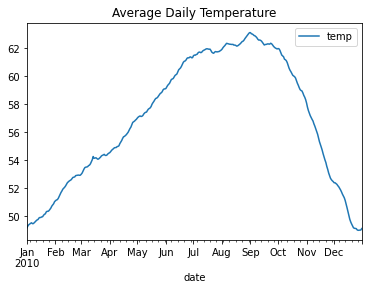

In [3]:
df = df.set_index('date')
pd.Timedelta('1d')
df.resample('D').mean().plot(title='Average Daily Temperature')

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

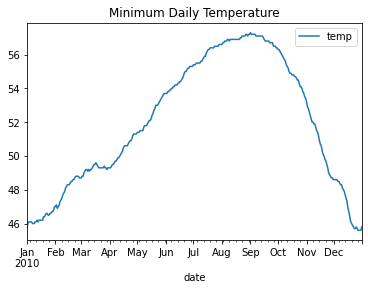

In [4]:
df.resample('D').min().plot(title='Minimum Daily Temperature')

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

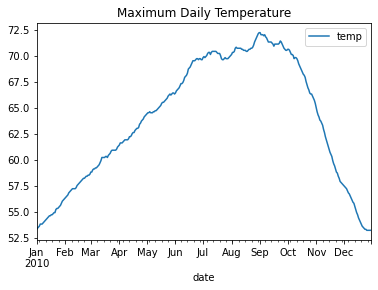

In [5]:
df.resample('D').max().plot(title='Maximum Daily Temperature')

4. Which month is the coldest, on average?

5. Which month has the highest average temperature?

In [6]:
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [7]:
# change in temp by day
daily = df.resample('D').temp.agg(['min', 'max'])
daily['temp_change'] = daily['max'] - daily['min']
daily['month'] = daily.index.strftime('%m-%b')
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date', ylabel='value'>

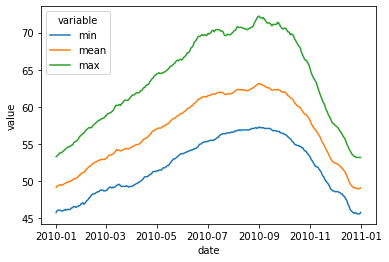

In [8]:
daily = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily = daily.reset_index().melt(id_vars=['date'])
sns.lineplot(data=daily, x='date', y='value', hue='variable')

## Exercises Part 2

In [12]:
vega_datasets.data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


1. Which year and month combination has the highest amount of precipitation?

In [13]:
df = vega_datasets.data.seattle_weather()
df = df.set_index('date')
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [18]:
# Highest precipitation
df.resample('M').precipitation.sum().sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

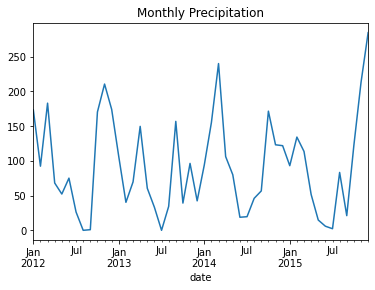

In [15]:
df.resample('M').precipitation.sum().plot(title='Monthly Precipitation')

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

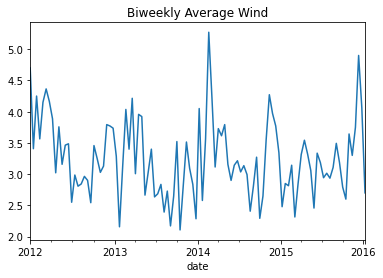

In [16]:
df.resample('2w').wind.mean().plot(title='Biweekly Average Wind')

4. Which year-month combination is the windiest?

In [21]:
df.groupby(['year', 'month']).sum().wind.idxmax()

(2015, '12-Dec')

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [17]:
df['is_sunny'] = df.weather == 'sun'
# NB. previously we did a resample, could also group by date components
df.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

6. In which month does it rain the most?

In [25]:
df.groupby('month').precipitation.sum().sort_values().tail()

month
01-Jan    466.0
10-Oct    503.4
03-Mar    606.2
12-Dec    622.7
11-Nov    642.5
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [26]:
df['nonzero_precipitation'] = df.precipitation > 0
df.groupby('month').nonzero_precipitation.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precipitation, dtype: float64

## Exercises Part 3

In [28]:
df = vega_datasets.data.flights_20k()
df = df.sort_values(by = 'date').reset_index(drop=True)
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.

In [29]:
pd.Series(range(1,11)).clip(lower=3, upper=7)
df.delay.clip(lower=0)

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

In [34]:
# pandas where and numpy where behave differently!
df.delay = np.where(df.delay < 0, 0, df.delay)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


2. Which hour of the day has the highest average delay?


In [35]:
df['hour'] = df.index.hour
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [36]:
df['weekday'] = df.index.strftime('%w-%a')
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [37]:
df['month'] = df.index.month
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64